# Games

## Description of the project

You work in the Strimchik online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.


Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data.

- Prepare data
- Conduct exploratory data analysis
- Make a profile of the user of each region
- Test hypotheses
- Write a general conclusion

## Exploring general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import scipy
from scipy import stats as st
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
path ='/Users/vzuga/Documents/jupyter/'

try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv(path+'/datasets/games.csv')

In [3]:
df.info()
print()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#look at the ranges of values
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [5]:
#explicit duplicates
df.duplicated().sum()

0

In [6]:
#share of missing values
df.isna().mean()

Name              0.00
Platform          0.00
Year_of_Release   0.02
Genre             0.00
NA_sales          0.00
EU_sales          0.00
JP_sales          0.00
Other_sales       0.00
Critic_Score      0.51
User_Score        0.40
Rating            0.40
dtype: float64

In [7]:
#number of missing values
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Conclusions:
* column names must be converted to lowercase
* the year of issue must be converted to int (after processing gaps, gaps cannot be converted to int)
* user_score must be converted to float
* there are gaps in name, year_of_release, genre, critic_score, user_score, rating
* values ​​in year_of_release from 1980 to 2016 and critic_score from 13 to 98 are fine
* I will check the remaining values ​​after converting to another format and when processing gaps
* no obvious duplicates

## Data preparation

* _Replace column names (reduce to lower case);_
* _Convert the data to the desired types. Describe in which columns the data type was changed and why;_
* _Process gaps if necessary:_
_Explain why you filled in the gaps in a certain way or why you didn't; Describe the reasons that could lead to omissions;_
* _Note the abbreviation 'tbd' in the user rating column. Separately parse this value and describe how to process it;_
* _Calculate the total sales in all regions and write them in a separate column._

### Column names

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Type conversion

I'll start with user_score. I'll look at the values.

In [9]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In addition to the estimates themselves, there are gaps and tbd (to be determined), in fact, tbd is also gaps. Astype will not work with object where there are non-numeric values. I will use to_numeric, everything that cannot be converted will be replaced with NaN.

The values themselves range from 0 to 10.

In [10]:
df.user_score = pd.to_numeric(df.user_score, errors='coerce')
df.user_score

0       8.00
1        NaN
2       8.30
3       8.00
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

### Missing values

In [11]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Two gaps in the title correspond to two gaps in the genre. I will remove these 2 lines.

In [12]:
df = df.drop([659, 14244])

I'll deal with the gaps in the release years of the games. There are 2% of them. I'll see if these omissions are related to the platform or the name.

In [13]:
df[df['year_of_release'].isna()].platform.unique()

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

In [14]:
df[df['year_of_release'].isna()].name.head(30)

183                                 Madden NFL 2004
377                                FIFA Soccer 2004
456                      LEGO Batman: The Videogame
475                      wwe Smackdown vs. Raw 2006
609                                  Space Invaders
627                                       Rock Band
657        Frogger's Adventures: Temple of the Frog
678     LEGO Indiana Jones: The Original Adventures
719                                  Call of Duty 3
805                                       Rock Band
1131                        Call of Duty: Black Ops
1142                                      Rock Band
1301                                 Triple Play 99
1506                                      Adventure
1538                     LEGO Batman: The Videogame
1585                                         Combat
1609                   LEGO Harry Potter: Years 5-7
1650                            NASCAR Thunder 2003
1699                      Hitman 2: Silent Assassin
1840        

It seems to me that these omissions are accidental. I don't see any connection to any particular platform or series of games, for example. Some games have a year in the title and, of course, you can write a function to get this year from there, but often the year in the title does not correspond to the year the games were released on different platforms. You can try to enrich the data and search the Internet, but I see no reason to waste time on this for the sake of 2% gaps. I will replace the missing years with 0.

In [15]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

In [16]:
df.isna().mean()

name              0.00
platform          0.00
year_of_release   0.00
genre             0.00
na_sales          0.00
eu_sales          0.00
jp_sales          0.00
other_sales       0.00
critic_score      0.51
user_score        0.55
rating            0.40
dtype: float64

There are gaps in critic_score, user_score, rating. There are too many gaps to replace them with some value, for example, the average. I'll leave gaps. Accordingly, critic_score will remain in float format.

### Values

I'll check the rest of the values.

In [17]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
df.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [19]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

I don't see any errors.

### Total sales

In [20]:
#calculation and addition of total_sales
#df.insert(8,'total_sales', df.na_sales+df.eu_sales+df.jp_sales+df.other_sales)
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [21]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Conclusions:
* changed column names
* translated user rating and release year into integers, critics' ratings left in fractional due to omissions
* removed 2 lines with gaps in the name and genre
* 2% of gaps in years of production filled in with zeros
* left the rest of the gaps
* tbd converted to NaN
* added total sales

## Exploratory data analysis

* _See how many games were released in different years. Is data for all periods important?_
* _See how sales have changed by platform. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?_
* _Take the data for the relevant actual period. Determine the current period yourself as a result of the study of the previous questions. The main factor is that these data will help build a forecast for 2017._
* _Don't take data from previous years into account._
* _Which platforms are leading in sales, rising or falling? Pick a few potentially profitable platforms._
* _Plot a boxplot of global game sales by platform. Describe the result._
* _See how sales within one popular platform are affected by user and critic reviews. Plot a scatterplot and calculate the correlation between reviews and sales. Formulate conclusions._
* _Relate findings to game sales on other platforms._
* _Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?_

### Number of games per year

<AxesSubplot:title={'center':'Number of games per year'}, xlabel='year_of_release'>

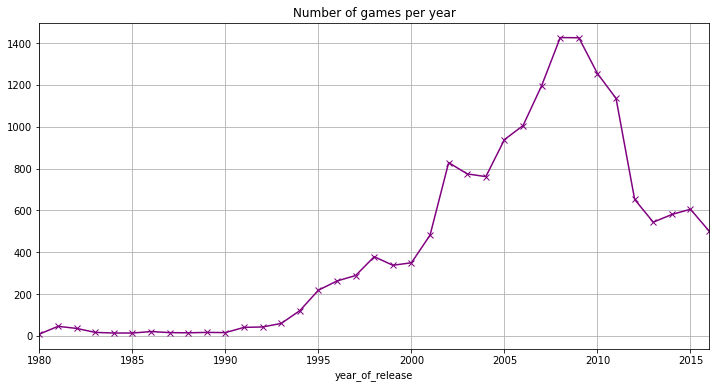

In [22]:
df.groupby('year_of_release')['name'].count().reset_index().plot(
    x='year_of_release', y='name', xlim=(1980, 2016), grid=True,
    legend=False, figsize=(12,6), style='-x', color='purple',
    title='Number of games per year'
)

The number of games released has been on the rise since 1990. For analysis, data before 1990 is not so important.

### Sales by platform. Actual period

<AxesSubplot:title={'center':'Sales per platform'}, xlabel='platform'>

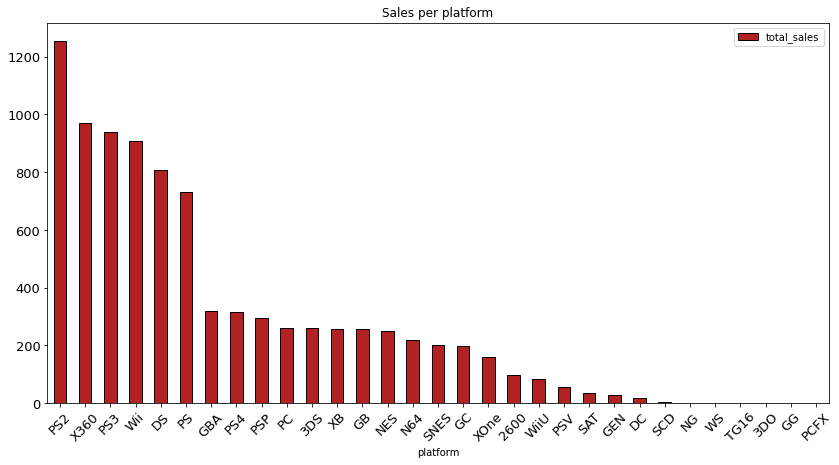

In [23]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(
    kind='bar', y='total_sales', figsize=(14,7), edgecolor='black', rot=45, legend=True, fontsize=13,
    title='Sales per platform', color='firebrick'
)

I will choose the first 6 platforms with a significantly higher number of sales and plot the distribution by year.

In [24]:
platform_top6 = list(df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(6)['platform'])
print('Top 6 gaming platforms :', platform_top6)

Top 6 gaming platforms : ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


I will write a function that will accept a list of platforms, build sales graphs and the number of games by year, and return a dataframe with the lifetime of the platform.

In [25]:
def platform_plotting (platform_list, data):
    
    platform_lifespan = {} #dictionary with platform lifetimes
    
    for platforms in platform_list:
        
        #grouping data by platform
        platform_grouped = data.query(
            'platform==@platforms and year_of_release!=0'
        ).groupby('year_of_release')['total_sales'].agg(sales='sum', games='count')
        
        #life time calculation
        lifespan = platform_grouped.reset_index()[
            'year_of_release'].max() - platform_grouped.reset_index()['year_of_release'].min()
        
        #caption on the chart: platform name and lifetime
        graph_title = str(platforms)+', lifespan '+str(lifespan)+' years'
        
        #plotting
        platform_grouped.plot(style='o-', title=graph_title, grid=True)
        
        #entry in the dictionary of the lifetime value
        platform_lifespan[platforms]= lifespan
    
    #creating DateFrame
    return pd.DataFrame(platform_lifespan.values(), index=platform_lifespan.keys(), columns=['lifespan'])

When I used the function, I found that the Nintendo DS had a lifespan of 28 years and the graph shows a spike in 1985, even though the DS came out in 2004. Find this value.

In [26]:
df.query('platform=="DS" and year_of_release=="1985"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


I will remove this value.

In [27]:
df = df.drop(15957)

I will apply the function

,lifespan
PS2,11
X360,11
PS3,10
Wii,10
DS,9
PS,9


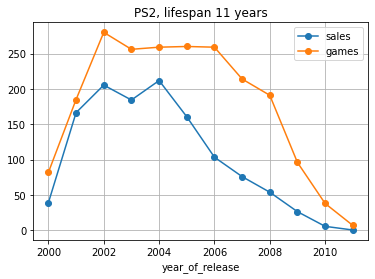

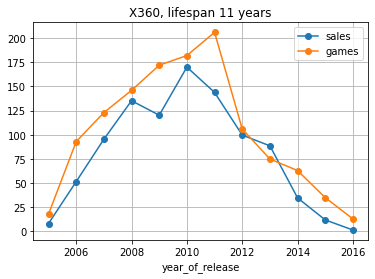

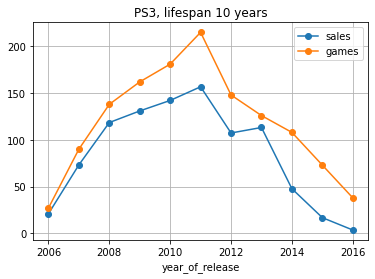

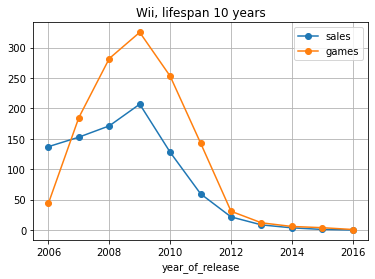

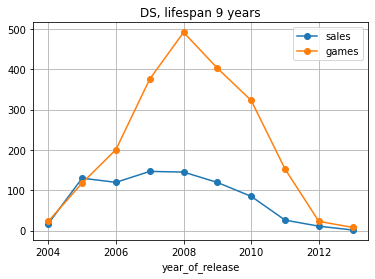

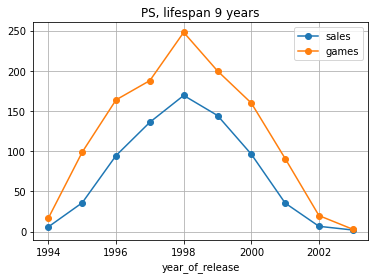

In [28]:
lifespan = platform_plotting(platform_top6, df)
lifespan

In [29]:
print('Average platform lifetime:',lifespan['lifespan'].mean())

Average platform lifetime: 10.0


In 4 out of 6 platforms, it is clearly seen on the graph that the maximum sales and games occur approximately in the middle of their life cycle (5 years).
Also on the graph of the number of games per year, you can see that for the last 5 years (2012-2016) the number of games has reached a plateau after the peak in the zero years and is about 600 games per year (see the graph below).

<AxesSubplot:title={'center':'Number of games per year'}, xlabel='year_of_release'>

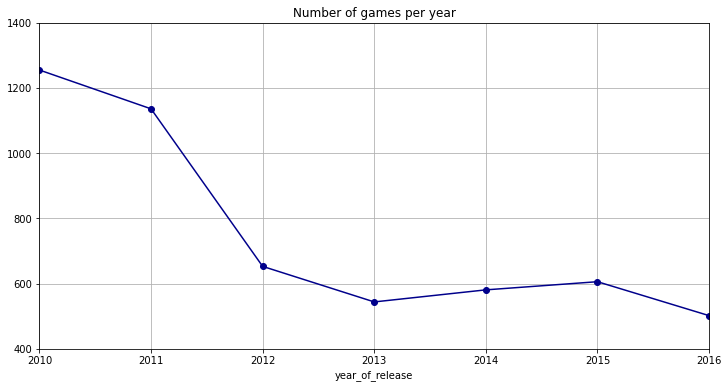

In [30]:
df.groupby('year_of_release')['name'].count().reset_index().plot(
    x='year_of_release', y='name', xlim=(2010, 2016), grid=True,
    legend=False, figsize=(12,6), style='-o', color='darkblue',
    title='Number of games per year', ylim=(400,1400)
)

Based on the foregoing, I will define the current period as the last 5 years and will continue to use data from 2012.

In [31]:
df2= df.query('year_of_release>=2012')

In [32]:
df2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Potentially profitable platforms

<AxesSubplot:title={'center':'Sales per platform'}, xlabel='platform'>

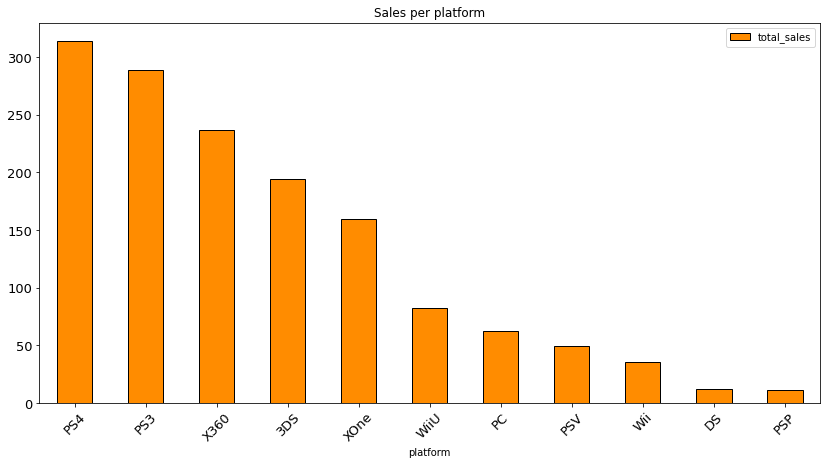

In [33]:
df2.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(
    kind='bar', y='total_sales', figsize=(14,7), edgecolor='black', rot=45, legend=True, fontsize=13,
    title='Sales per platform', color='darkorange'
)

In terms of sales, Sony consoles (PS4 and PS3) are in the lead, followed by consoles from Microsoft (Xbox360 and Xbox One), and the Nintendo 3DS portable gaming system also entered the top 5.

In [34]:
platform_top5 = list(df2.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(5)['platform'])
print('Top 5 sales:', platform_top5)

Top 5 sales: ['PS4', 'PS3', 'X360', '3DS', 'XOne']


,lifespan
PS4,3
PS3,4
X360,4
3DS,4
XOne,3


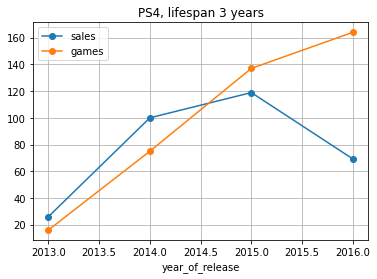

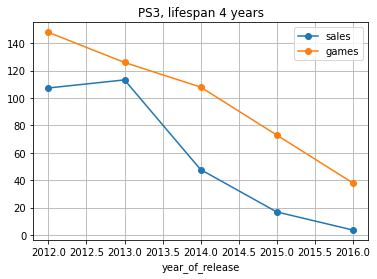

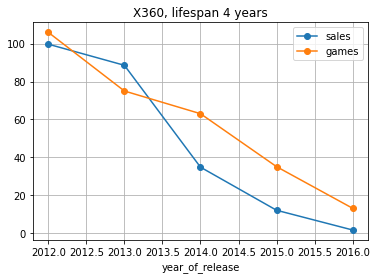

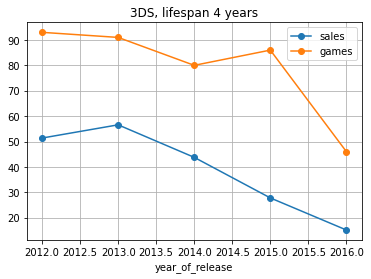

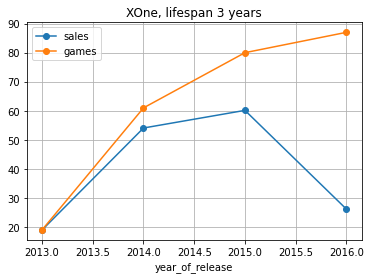

In [35]:
platform_plotting(platform_top5, df2)

It is clearly seen that sales and number of games for the seventh generation of gaming systems (PS3 and Xbox360) are falling, while the number of games for the eighth generation is growing.

In [36]:
df2.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').loc[[2015, 2016]]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


**We will consider potentially profitable consoles of the eighth generation: PS4 and Xbox One**

I'll plot a boxplot chart of global game sales by platform.

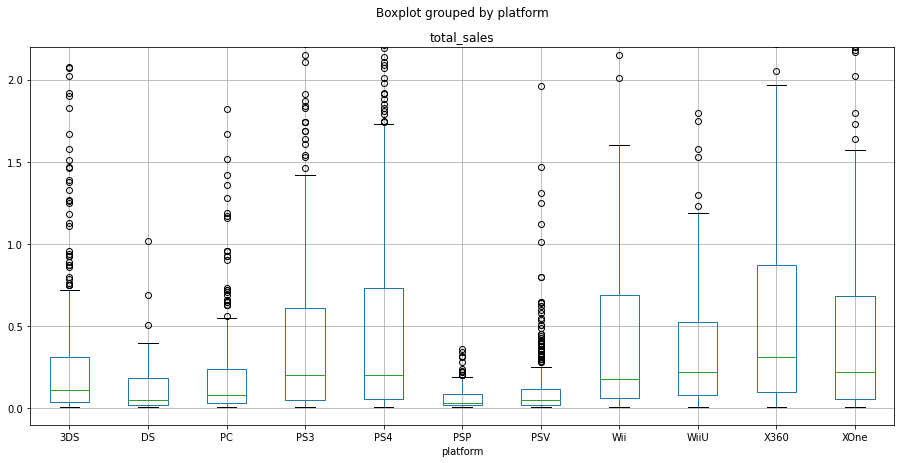

In [37]:
df2.boxplot(
    'total_sales', by='platform', figsize=(15,7)
)
plt.ylim(-0.1, 2.2)
plt.show()

Too much information, uncomfortable to read, but it can be seen that most sales of each game over 5 years are in the range of up to 1 million and the median sales are close, except for sales of games for Sony portable gaming systems - PSP and PSV.

I will build a swing chart for the Top 5 platforms.

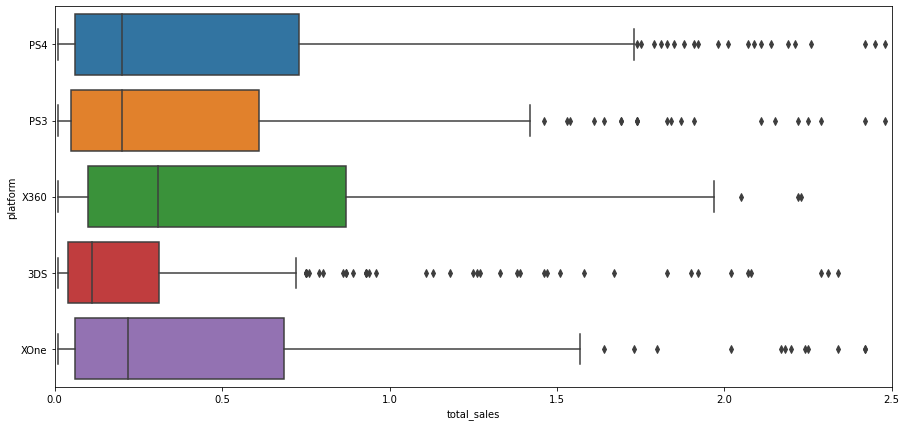

In [38]:
plt.figure(figsize=(15,7))
plt.xlim(0, 2.5)
sns.boxplot(data = df2.query(
    'platform in @platform_top5'), orient='h', y='platform', x='total_sales', order=platform_top5)
plt.show()

This graph shows that the range of sales over the past 5 years for the Xbox and Playstation are close. We can conclude that for the most popular consoles (Xbox and PS) games are sold about the same.

In this case, the outliers on the chart are errors in sales values ​​or single extremely rare cases of games with a high number of sales. Since we are considering the sales of not one particular well-selling game, but all sales in general, these outlier values ​​are not relevant.

### Reviews

I will calculate the correlation and build scatterplots for the Top 5.

_To estimate the correlation, I chose the Spearman method, it copes better with outliers_

In [39]:
def corr_scatter(platforms):
    
    #scatterplot for critics score
    df2.query('platform==@platforms').plot.scatter(x="critic_score", y="total_sales",
                                                   color="DarkBlue", label=platforms, s=10)
    
    #scatterplot for users score
    #df2.query('platform==@platforms').plot.scatter(x="user_score", y="total_sales", 
    #color="DarkGreen", label=platforms, s=10)
    
    #correlation
    display(platforms, df2.query('platform==@platforms')[['total_sales', 'critic_score',
                                                          'user_score']].corr(method='spearman'))

'PS4'

,total_sales,critic_score,user_score
total_sales,1.00,0.51,-0.03
critic_score,0.51,1.00,0.43
user_score,-0.03,0.43,1.00


'PS3'

,total_sales,critic_score,user_score
total_sales,1.00,0.58,0.08
critic_score,0.58,1.00,0.44
user_score,0.08,0.44,1.00


'X360'

,total_sales,critic_score,user_score
total_sales,1.00,0.64,0.13
critic_score,0.64,1.00,0.49
user_score,0.13,0.49,1.00


'3DS'

,total_sales,critic_score,user_score
total_sales,1.00,0.38,0.21
critic_score,0.38,1.00,0.78
user_score,0.21,0.78,1.00


'XOne'

,total_sales,critic_score,user_score
total_sales,1.00,0.53,-0.10
critic_score,0.53,1.00,0.35
user_score,-0.10,0.35,1.00


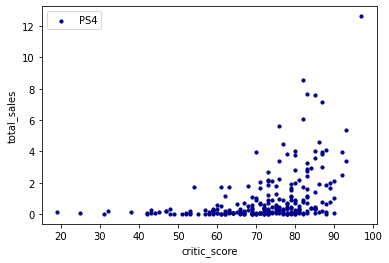

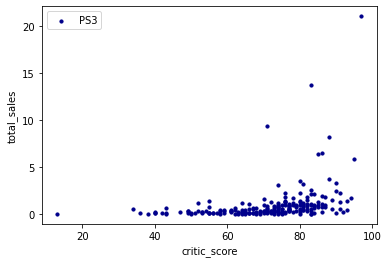

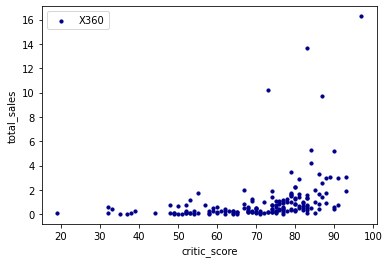

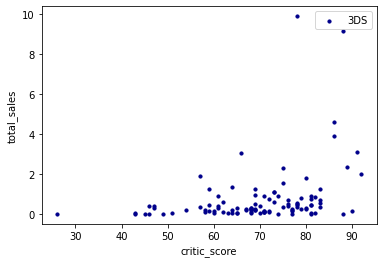

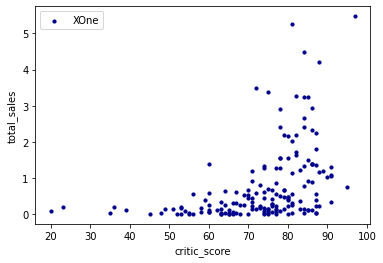

In [40]:
for value in platform_top5:
    corr_scatter(value)

There is an average positive correlation between reviews given by critics and sales. In the case of user reviews, a weak correlation was found only for Nintendo 3DS, possibly due to a large number of gaps in user ratings.

### Genre

<AxesSubplot:xlabel='genre'>

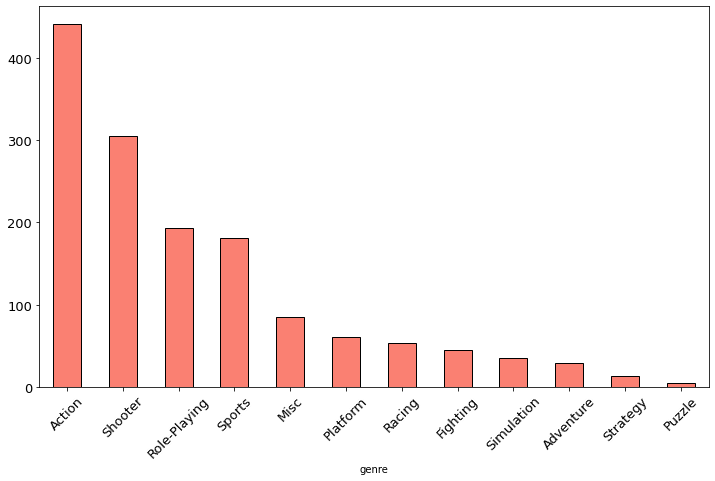

In [41]:
df2.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot.bar(
    rot=45, color='salmon', edgecolor='black', fontsize=13, figsize=(12,7))

In [42]:
pd.pivot_table(df2, values='total_sales', columns='genre', aggfunc='sum', index='platform').query('index in @platform_top5')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
3DS,45.49,4.30,8.46,9.45,19.11,2.66,0.28,79.30,0.13,19.93,4.23,1.27
PS3,115.75,6.09,11.00,8.88,4.26,0.04,11.56,22.62,60.39,1.78,44.84,1.58
PS4,96.10,6.34,8.65,8.19,7.69,0.02,12.14,28.99,88.56,1.23,55.61,0.62
X360,81.60,3.27,4.97,14.83,2.14,NaN,8.41,9.80,72.70,1.53,36.39,0.90
XOne,37.31,2.68,2.45,7.43,0.93,NaN,9.79,10.55,60.33,0.69,26.74,0.42


In [43]:
df2.groupby('genre')['total_sales'].agg(['sum', 'count', 'mean', 'median']).sort_values(
    by='mean', ascending=False)

,sum,count,mean,median
genre,,,,
Shooter,304.73,235,1.30,0.44
Platform,61.00,85,0.72,0.21
Sports,181.07,268,0.68,0.24
Role-Playing,192.80,370,0.52,0.14
Racing,53.50,115,0.47,0.14
Misc,85.04,192,0.44,0.12
Simulation,35.12,80,0.44,0.12
Action,441.12,1031,0.43,0.12
Fighting,44.49,109,0.41,0.13


The top-selling genres are action, shooter, role-playing and sports games. Strategies and puzzles sell much worse than all.

If you look at sales per game unit (average), you can see that the most profitable genres are shooters, platformers, and sports games.
Action has the highest sales due to the popularity of the genre, the average sales of this genre are small.
It is also clearly seen that the average value of sales is greater than the median, which means that the distribution is shifted to the right (there are bestsellers).

If you look at the distribution by platform, you can clearly see that on Nintendo sales are distributed differently by genre: role-playing games in the first place (Pokémon), action in the second place (Legend of Zelda and others), then there are genres that are not popular on other platforms - simulators (Animal Crossing) and platformers (Mario).

In [44]:
df2.query('platform=="3DS"').sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.00,7.20,E,9.90
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.00,8.70,E,9.17
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,NaN,5.22
235,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.00,8.40,E,4.59
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.00,8.70,T,3.89
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,NaN,3.44


### Conclusions:

* The number of released games starts to grow from 1990 and peaks in 2008-2009
* The market leaders in terms of sales are the series of Sony Playstation, Microsoft Xbox and Nintendo game consoles (different generations of DS, Wii and Gameboy).
* Average platform lifetime is 10 years
* The current period of the last 5 years was chosen for the analysis
* In these 5 years, the most popular platforms were Sony, Microsoft and Nintendo game consoles (in descending order of sales)
* Most of the games have sold about half a million copies in 5 years. Games for different consoles are sold about the same, except for Nintendo - sales are slightly lower there.
* User reviews have little effect on sales
* Critics' ratings correlate with sales
* Most __popular__ genres: action, shooter, role-playing and sports

## User portrait of each region

_Define for the user of each region (NA, EU, JP):_
* _Most popular platforms (top 5). Describe differences in sales shares._
* _Most popular genres (top 5). Explain the difference._
* _Does the ESRB rating affect sales in a particular region?_

### Platforms

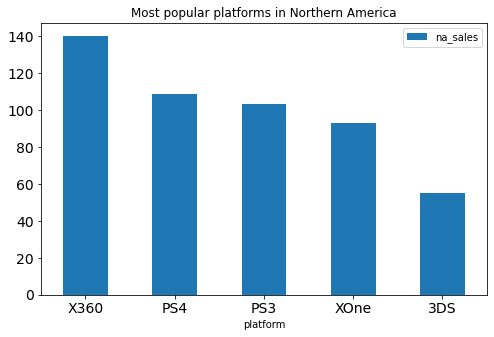

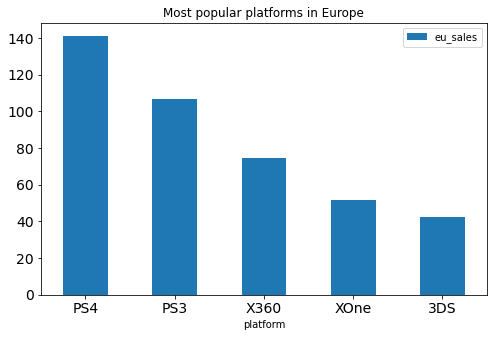

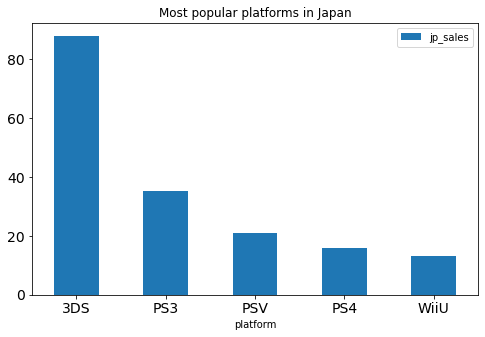

In [45]:
df2.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().plot(
    kind='bar', y='total_sales', rot=0, legend=True, fontsize=14,
    title='Most popular platforms in Northern America', figsize=(8,5), linewidth=2,
    #edgecolor='blue', color='red'
)
plt.show()

df2.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().plot(
    kind='bar', y='total_sales', rot=0, legend=True, fontsize=14,
    title='Most popular platforms in Europe', figsize=(8,5), linewidth=3,
    #color='blue', edgecolor='gold'
)
plt.show()

df2.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().plot(
    kind='bar', y='total_sales', rot=0, legend=True, fontsize=14,
    title='Most popular platforms in Japan', figsize=(8,5), linewidth=4,
    #color='white', edgecolor='red'
)
plt.show()

In America, the Xbox360 turned out to be the most popular platform, in Europe the PlayStation leads, and in Japan, Japanese consoles are preferred - only Sony and Nintendo are in the top.

### Genre

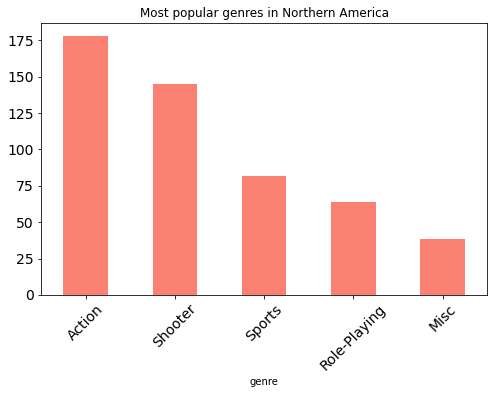

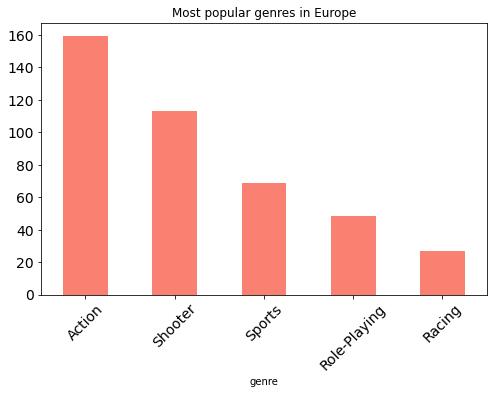

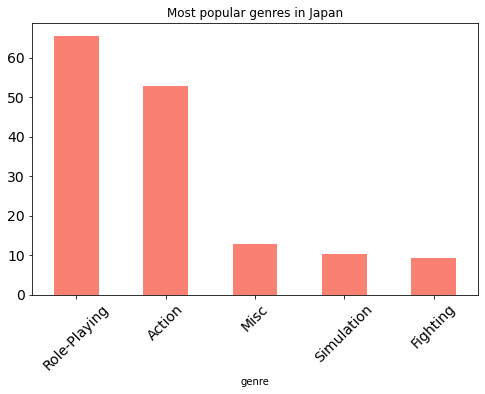

In [46]:
df2.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().plot(
    kind='bar', y='total_sales', rot=45, fontsize=14,
    title='Most popular genres in Northern America', figsize=(8,5), color='salmon'
)
plt.show()

df2.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().plot(
    kind='bar', y='total_sales', rot=45, fontsize=14,
    title='Most popular genres in Europe', figsize=(8,5), color='salmon'
)
plt.show()

df2.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().plot(
    kind='bar', y='total_sales', rot=45, fontsize=14,
    title='Most popular genres in Japan', figsize=(8,5), color='salmon'
)
plt.show()

If genre preferences in Europe and America practically coincide, then in Japan they prefer role-playing games and action, all other genres are equally popular.

### Rating

In [47]:
df2['rating'] = df2['rating'].fillna('Unknown')

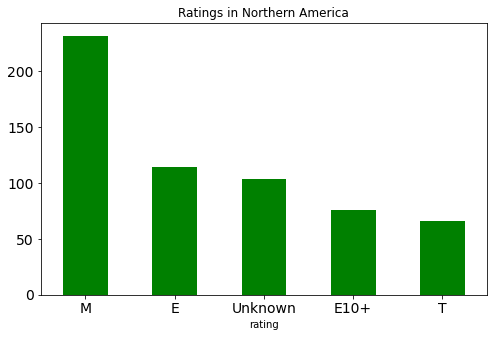

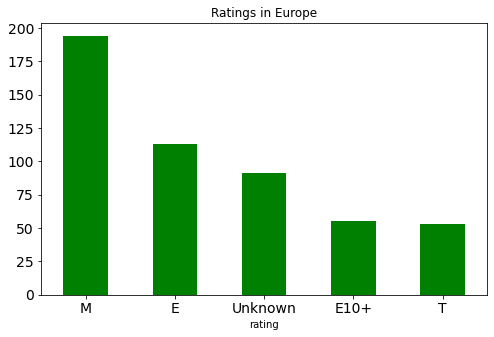

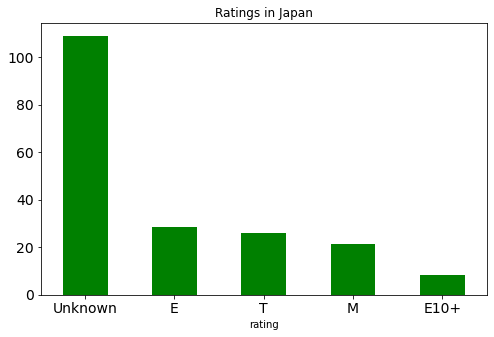

In [48]:
df2.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(
    kind='bar', y='total_sales', rot=0, fontsize=14,
    title='Ratings in Northern America', figsize=(8,5), color='green'
)
plt.show()

df2.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(
    kind='bar', y='total_sales', rot=0, fontsize=14,
    title='Ratings in Europe', figsize=(8,5), color='green'
)
plt.show()

df2.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(
    kind='bar', y='total_sales', rot=0, fontsize=14,
    title='Ratings in Japan', figsize=(8,5), color='green'
)
plt.show()

The distribution of ratings in Europe and America is the same: games for adults and for any age audience are best sold. In Japan, there are many games whose rating is not known, the rest of the ratings are presented in the same way.

Perhaps unrated games are purely Japanese and for the Japanese market, and since the rating is American, they do not fall into it.

### Conclusions:

* Playstation is the best-selling platform, only in America it is slightly inferior to Xbox
* Action and shooters are the most popular genres in America and Europe, RPG and action in Japan
* In America and Europe, 17+ games sell best, in Japan - for all age audiences
* In general, the Japanese market differs from the markets of America and Europe both in preferences in the choice of platform and in the genre of games.

## Hypothesis testing and clarification

* _Average user ratings for Xbox One and PC platforms are the same;_
* The average user ratings for Action and Sports genres are different._


_Set the alpha threshold yourself._

_Explain:_
* _How did you formulate the null and alternative hypotheses;_
* _What criterion was used to test the hypotheses and why._

### Hypothesis 1

**Average user ratings for Xbox One and PC platforms are the same**

I formulate the null and alternative hypotheses.

Null Hypothesis: The average user ratings of the Xbox One and PC platforms are the same. Alternative one-sided hypothesis: The average user rating of the Xbox One platform is greater than the average user rating of the PC platform.

In [49]:
print("Average rating XOne: ", df2.query('platform=="XOne"').user_score.mean(), "±", np.std(df2.query('platform=="XOne"').user_score))
print("Average rating PC: ", df2.query('platform=="PC"').user_score.mean(), "±", np.std(df2.query('platform=="PC"').user_score))

Average rating XOne:  6.521428571428572 ± 1.377141546212499
Average rating PC:  6.428640776699029 ± 1.660420199796021


In [50]:
print("Sample size XOne: ", len(df2.query('platform=="XOne"').user_score.dropna()))
print("Sample size PC: ", len(df2.query('platform=="PC"').user_score.dropna()))

Sample size XOne:  182
Sample size PC:  206


The sample size is small and I can just calculate and see the averages.

But this is too easy, because there is a special method for testing the hypothesis that the mean of two populations is equal based on samples taken from them: scipy.stats.ttest_ind!

I will take the threshold value alpha = 5%. The samples are about the same and the variance is about the same.

In [51]:
#null hypothesis
alpha = .05 # significance level
# if p-value is less than it, we reject the hypothesis
results = st.ttest_ind(df2.query('platform=="XOne"').user_score.dropna(), df2.query(
    'platform=="PC"').user_score.dropna())

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject")

p-value:  0.5535080500643661
Failed to reject


Ratings are the same

### Hypothesis 2

**Average user ratings for Action and Sports are different.**

Null hypothesis: the ratings of the Action and Sports genres are the same. Alternative hypothesis: the ratings are different.

In [52]:
print("Average rating Action: ", df2.query('genre=="Action"').user_score.mean(), "±", np.std(
    df2.query('genre=="Action"').user_score))

print("Average rating Sports: ", df2.query('genre=="Sports"').user_score.mean(), "±", np.std(
    df2.query('genre=="Sports"').user_score))

Average rating Action:  6.825047801147227 ± 1.373124915673706
Average rating Sports:  5.455897435897437 ± 1.7341823137066392


In [53]:
print("Sample size Action: ", len(df2.query('genre=="Action"').user_score.dropna()))
print("Sample size Sports: ", len(df2.query('genre=="Sports"').user_score.dropna()))

Sample size Action:  523
Sample size Sports:  195


In [54]:
alpha = .05
results = st.ttest_ind(df2.query('genre=="Action"').user_score.dropna(), df2.query(
    'genre=="Sports"').user_score.dropna(), equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject")

p-value:  4.24307776572644e-20
Rejecting the null hypothesis


Ratings are different

### Conclusions:
* average user ratings for Xbox One and PC platforms are the same
* average user ratings for Action and Sports genres are different

## General conclusion

* We analyzed game sales for different years and selected the current period equal to the last 5 years
* During this period, the most popular platforms were Sony, Microsoft and Nintendo consoles
* Consoles of the latest generations of the same manufacturers are promising. Even though sales of the Nintendo 3DS dropped in 2016, Nintendo remains the third best selling platform and has its own fans (the new Nintendo Switch came out in 2017 and was slightly out of the sample).
* Action games, shooters, role-playing and sports games are the most popular
* A portrait of the user of each region was compiled: preferences in America and Europe are approximately the same, while Japan has its own specifics
* Tested hypotheses about differences in user ratings
* In America, Xbox outsold Playstation despite Sony leading in Europe and Japan.
* The most popular genres are action and shooter, except for Japan, where role-playing games are preferred to shooters.
*Most often buy games with a rating of 17+. There is no exact ranking data for Japan.